<a href="https://colab.research.google.com/github/Zenith1618/Store-Sales-Forecasting-with-Time-Series-Analysis/blob/main/Store_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [36]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")


plt.style.use('fivethirtyeight')
# matplotlib.rcParams['axes.labelsize'] = 14
# matplotlib.rcParams['xtick.labelsize'] = 12
# matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

# Loading the Dataset

In [2]:
df = pd.read_excel("superstore.xls")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### There are several categories of product. Lets focus on time series analysis and forecasting of Furniture sales

In [4]:
furniture = df.loc[df["Category"] == 'Furniture']

In [5]:
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


Lets find out the how much data we have

In [6]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

So we have 4-year of furniture sales data

# Data Preprocessing

### Removing unwanted rows

In [7]:
furniture.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID',
        'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']

furniture.drop(cols, axis=1, inplace=True)

### Checking Missing values

In [9]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

We have no null data in the dataset

### Sorting the Dates

In [10]:
furniture.sort_values('Order Date', inplace=True, ascending=True)

In [11]:
furniture.head()

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940


In [12]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
# Group the furniture df by the 'Order Date' column to sum the 'Sales' values for each group and then convert the result back to a df with a default integer index.

Setting the index

In [13]:
furniture.set_index('Order Date', inplace=True)

In [14]:
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [15]:
furniture.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [16]:
furniture.tail()

,Sales
Order Date,
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568
2017-12-29,2330.7180
2017-12-30,323.1360


In [17]:
y = furniture['Sales']

### The data we currently have is tricky to work with as its sales data and we cant equate the whole sales data day wise as it will contain a lot of noise so we will use the average daily sales value for the month instead and we will use the start of each month as timestamp

In [18]:
y = furniture['Sales'].resample('MS').mean()        # MS: Month Start

In [19]:
#Lets look into the data
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

# Visualizing the Data

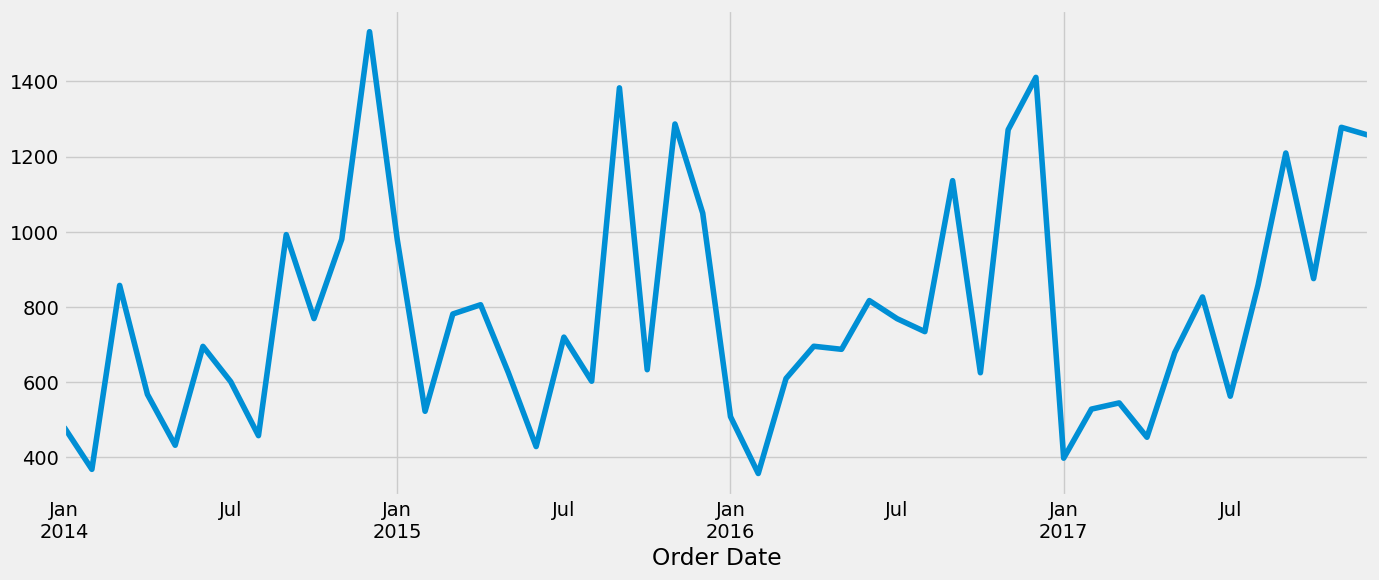

In [20]:
y.plot(figsize=(15,6))
plt.show()

The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

We can verify it by decomposition as well

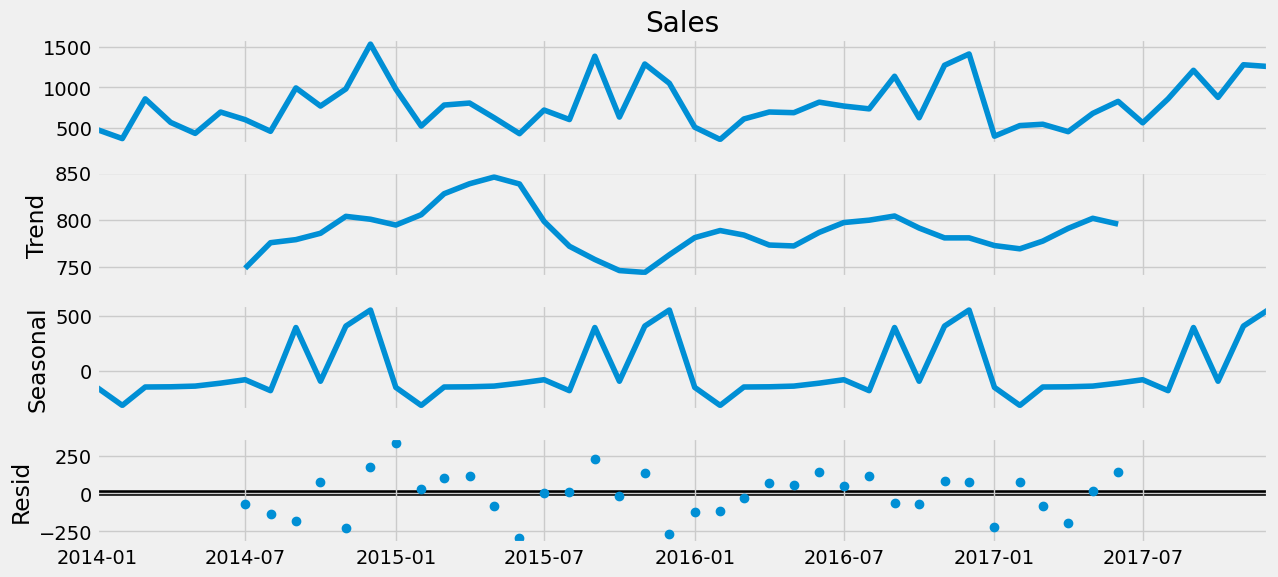

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

The plot above clearly shows that the sales of furniture is somewhat unstable, along with obvious seasonality.

Lets check out pacf & acf plot to check if there is any spike.

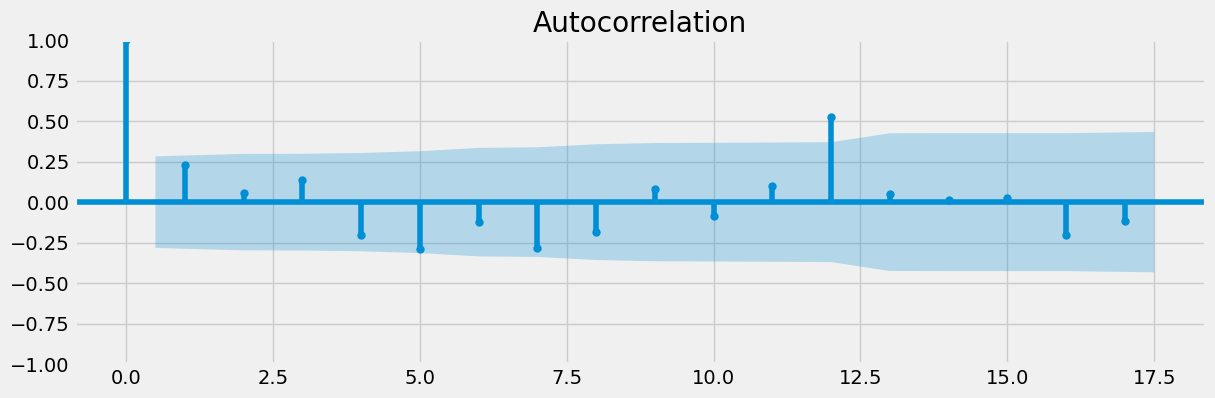

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
rcParams['figure.figsize'] = 13,4
plot_acf(y)
plt.show()

The ACF plot shows the correlation of the time series with its own lagged values where Lag 0 has the highest correlation. We can see a good MA component -> 'q' of around 12 (as there is a huge decay just after this) which also indicate seasonality.

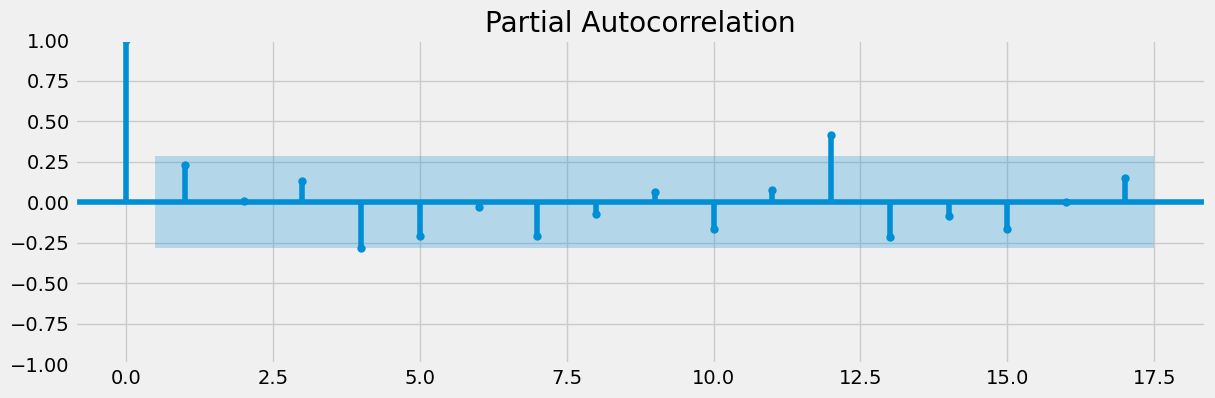

In [23]:
plot_pacf(y)
plt.show()

The PACF plot shows the partial correlation of the time series with its own lagged values, removing the effect of intermediate lags. We see the same spike here as well around 12, for AR Component - 'p'.

Both of these graph combined indicate that we have a seasonal data

### Stationarity Check

The data is seasonal and by the looks of the data, it looks stationary so lets verify it using ADF Test

In [24]:
from statsmodels.tsa.stattools import adfuller


def adf_test(series):
  result = adfuller(series)
  print('ADF Statistics: {}'.format(result[0]))
  print('p-value : {}'.format(result[1]))
  if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
  else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [25]:
adf_test(y)

ADF Statistics: -5.191070187339275
p-value : 9.1687566556655e-06
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


As the data is stationary we can proceed further for forecasting the data

# Forecasting

### Hyperparameter tuning

#### TPE
Tree-structured Parzen Estimator (TPE) is an efficient algorithm for hyperparameter optimization that models the objective function using a tree-structured Parzen estimator which is usually faster than Bayesian Optimization for high dimensional spaces.

In [60]:
!pip install hyperopt

In [26]:
y.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 48 entries, 2014-01-01 to 2017-12-01
Freq: MS
Series name: Sales
Non-Null Count  Dtype  
--------------  -----  
48 non-null     float64
dtypes: float64(1)
memory usage: 1.8 KB


In [67]:
import pandas as pd
import numpy as np
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from hyperopt.pyll.base import scope
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Define the search space for hyperparameters
space = {
    'p': scope.int(hp.quniform('p', 0, 3, 1)),
    'd': scope.int(hp.quniform('d', 0, 3, 1)),
    'q': scope.int(hp.quniform('q', 0, 3, 1)),
    'P': scope.int(hp.quniform('P', 0, 3, 1)),
    'D': scope.int(hp.quniform('D', 0, 3, 1)),
    'Q': scope.int(hp.quniform('Q', 0, 3, 1)),
    'm': scope.int(hp.quniform('m', 1, 24, 3)),
}

# Define the objective function for optimization
def objective(params):
    order = (params['p'], params['d'], params['q'])
    seasonal_order = (params['P'], params['D'], params['Q'], params['m'])

    try:
        model = sm.tsa.statespace.SARIMAX(y,
                                          order=order,
                                          seasonal_order=seasonal_order,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
        results = model.fit(disp=False)
        forecast = results.get_forecast(steps=len(y))
        mse = mean_squared_error(y, forecast.predicted_mean)
    except:
        mse = np.inf

    return {'loss': mse, 'status': STATUS_OK}

# Run the optimization
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=1000,
            trials=trials)

print("Best Parameters:", best)

100%|██████████| 1000/1000 [11:28<00:00,  1.45trial/s, best loss: 24595.999021371685]
Best Parameters: {'D': 1.0, 'P': 1.0, 'Q': 2.0, 'd': 0.0, 'm': 12.0, 'p': 1.0, 'q': 0.0}


#### Grid Search

In [27]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


Lets test out the parameter

In [28]:
aic_values = []

# Iterate over combinations of parameters
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            aic_values.append((param, param_seasonal, results.aic))
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except Exception as e:
            print(e)
            continue

# Sort AIC values by the third element (AIC) and get top 5
top_5 = sorted(aic_values, key=lambda x: x[2])[:5]

# Print top 5 best parameters
print("\nTop 5 Best Parameters:")
for i, (param, param_seasonal, aic) in enumerate(top_5, 1):
    print(f"{i}: ARIMA{param}x{param_seasonal}12 - AIC: {aic}")

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1523.5085449297978
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:354.78627324091724
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130919703
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.27028997935736
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:146.88834672456125
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:336.95366048620485
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:149.84561033293477
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418338
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1317.1698862853953
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:309.56039684312793
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.24882803033336
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:148.8399670229594
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:162.12029487165506
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:151.35761674712157
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 0, 0, 12

As we have got some unusually low values of AIC, we will make 3 different list, choosing the top 5 from AIC<20, 50<AIC<150 & AIC>200 and then use MSE Score to see how well they perform

In [35]:
# Initialize lists to store top 5 models for each AIC category
top_5_below_20 = []
top_5_between_50_150 = []
top_5_above_200 = []

# Iterate through aic_values and categorize based on AIC ranges
for param, param_seasonal, aic in aic_values:
    if aic < 20:
        top_5_below_20.append((param, param_seasonal, aic))
    elif 50 <= aic < 150:
        top_5_between_50_150.append((param, param_seasonal, aic))
    elif aic > 200:
        top_5_above_200.append((param, param_seasonal, aic))

# Sort lists based on AIC values
top_5_below_20.sort(key=lambda x: x[2])
top_5_between_50_150.sort(key=lambda x: x[2])
top_5_above_200.sort(key=lambda x: x[2])

# Extract only the top 5 from each list
top_5_below_20 = top_5_below_20[:5]
top_5_between_50_150 = top_5_between_50_150[:5]
top_5_above_200 = top_5_above_200[:5]

# Print or use these lists as needed
print("Top 5 models with lowest AIC values below 20:")
for i, (param, param_seasonal, aic) in enumerate(top_5_below_20, 1):
    print(f"{i}: ARIMA{param}x{param_seasonal}12 - AIC: {aic}")

print("\nTop 5 models with lowest AIC values between 50 and 150:")
for i, (param, param_seasonal, aic) in enumerate(top_5_between_50_150, 1):
    print(f"{i}: ARIMA{param}x{param_seasonal}12 - AIC: {aic}")

print("\nTop 5 models with lowest AIC values above 200:")
for i, (param, param_seasonal, aic) in enumerate(top_5_above_200, 1):
    print(f"{i}: ARIMA{param}x{param_seasonal}12 - AIC: {aic}")


Top 5 models with lowest AIC values below 20:
1: ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC: 6.0
2: ARIMA(0, 0, 0)x(2, 2, 0, 12)12 - AIC: 6.0
3: ARIMA(0, 1, 0)x(0, 2, 2, 12)12 - AIC: 6.0
4: ARIMA(0, 1, 0)x(2, 2, 0, 12)12 - AIC: 6.0
5: ARIMA(0, 2, 0)x(0, 2, 2, 12)12 - AIC: 6.0

Top 5 models with lowest AIC values between 50 and 150:
1: ARIMA(0, 2, 2)x(0, 2, 1, 12)12 - AIC: 96.60020636851499
2: ARIMA(0, 2, 2)x(1, 2, 1, 12)12 - AIC: 98.85174070380668
3: ARIMA(0, 2, 2)x(0, 1, 2, 12)12 - AIC: 99.04347046384993
4: ARIMA(1, 2, 2)x(0, 1, 2, 12)12 - AIC: 99.38584186852346
5: ARIMA(2, 2, 2)x(0, 2, 1, 12)12 - AIC: 99.54879583766186

Top 5 models with lowest AIC values above 200:
1: ARIMA(0, 2, 2)x(0, 1, 1, 12)12 - AIC: 262.0630438282236
2: ARIMA(0, 2, 2)x(1, 1, 1, 12)12 - AIC: 263.5280412868915
3: ARIMA(1, 2, 2)x(0, 1, 1, 12)12 - AIC: 263.81022451409046
4: ARIMA(2, 2, 2)x(0, 1, 1, 12)12 - AIC: 264.3514973070063
5: ARIMA(1, 2, 2)x(1, 1, 1, 12)12 - AIC: 265.430621003674


In [40]:
top_5_between_50_150

[((0, 2, 2), (0, 2, 1, 12), 96.60020636851499),
 ((0, 2, 2), (1, 2, 1, 12), 98.85174070380668),
 ((0, 2, 2), (0, 1, 2, 12), 99.04347046384993),
 ((1, 2, 2), (0, 1, 2, 12), 99.38584186852346),
 ((2, 2, 2), (0, 2, 1, 12), 99.54879583766186)]

In [43]:
mse_values = []

# Function to calculate MSE for a SARIMA model
def calculate_mse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

# Iterate over each category of SARIMA models and their top 5 configurations
for category, models in [("below_20", top_5_below_20), ("between_50_150", top_5_between_50_150), ("above_200", top_5_above_200)]:
    for i, (param, param_seasonal, aic) in enumerate(models, 1):
        # Fit SARIMA model
        mod = sm.tsa.statespace.SARIMAX(y,
                                        order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
        results = mod.fit()

        # Make predictions
        forecast = results.get_forecast(steps=len(y))

        # Calculate MSE
        mse = calculate_mse(y, forecast.predicted_mean)

        # Append results to mse_values list
        mse_values.append((category, param, param_seasonal, mse))

# Sort mse_values based on MSE
mse_values.sort(key=lambda x: x[3])

# Initialize lists to store top 3 models
top_3_models = {
    "below_20": [],
    "between_50_150": [],
    "above_200": []
}

# Collect top 3 models with lowest MSE for each category
for category, param, param_seasonal, mse in mse_values:
    if len(top_3_models[category]) < 3:
        top_3_models[category].append((param, param_seasonal, mse))

# Print the top 3 models with lowest MSE for each category
for category, models in top_3_models.items():
    print(f"Top 3 models with lowest MSE for {category}:")
    for i, (param, param_seasonal, mse) in enumerate(models, 1):
        print(f"{i}: ARIMA{param}x{param_seasonal} - MSE: {mse:.2f}")
    print()

Top 3 models with lowest MSE for below_20:
1: ARIMA(0, 0, 0)x(0, 2, 2, 12) - MSE: 257753.43
2: ARIMA(0, 0, 0)x(2, 2, 0, 12) - MSE: 257753.43
3: ARIMA(0, 1, 0)x(0, 2, 2, 12) - MSE: 10206854.05

Top 3 models with lowest MSE for between_50_150:
1: ARIMA(0, 2, 2)x(0, 1, 2, 12) - MSE: 35295.85
2: ARIMA(2, 2, 2)x(0, 2, 1, 12) - MSE: 23843257.98
3: ARIMA(0, 2, 2)x(1, 2, 1, 12) - MSE: 125000577.69

Top 3 models with lowest MSE for above_200:
1: ARIMA(0, 2, 2)x(0, 1, 1, 12) - MSE: 24200.66
2: ARIMA(1, 2, 2)x(0, 1, 1, 12) - MSE: 33631.49
3: ARIMA(2, 2, 2)x(0, 1, 1, 12) - MSE: 80539.60



----------------------------
Now lets fit the 3 best model out of those and find out. We will use summary attribute for this.

The summary attribute that results from the output of SARIMA returns a significant amount of information, but we’ll focus our attention on the table of coefficients. The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight.

In [146]:
model = sm.tsa.statespace.SARIMAX(y,
                                order=(0,2,2),
                                seasonal_order=(0,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False
                                )
results = model.fit()
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                Sales   No. Observations:                   48
Model:             SARIMAX(0, 2, 2)x(0, 1, [1], 12)   Log Likelihood                -127.032
Date:                              Thu, 18 Jul 2024   AIC                            262.063
Time:                                      13:48:07   BIC                            265.841
Sample:                                  01-01-2014   HQIC                           262.702
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -2.2899      1.427     -1.605      0.108      -5.086       0.506
ma.L2          1.28

In [126]:
model1 = sm.tsa.statespace.SARIMAX(y,
                                order=(1,2,2),
                                seasonal_order=(0,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False
                                )
results1 = model1.fit()
print(results1.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                Sales   No. Observations:                   48
Model:             SARIMAX(1, 2, 2)x(0, 1, [1], 12)   Log Likelihood                -126.905
Date:                              Thu, 18 Jul 2024   AIC                            263.810
Time:                                      13:36:49   BIC                            268.532
Sample:                                  01-01-2014   HQIC                           264.609
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2261      0.414      0.546      0.585      -0.586       1.038
ma.L1         -1.98

In [125]:
model2 = sm.tsa.statespace.SARIMAX(y,
                                order=(0,2,2),
                                seasonal_order=(0,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False
                                )
results2 = model2.fit()
print(results2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(0, 2, 2)x(0, 1, 2, 12)   Log Likelihood                 -44.522
Date:                            Thu, 18 Jul 2024   AIC                             99.043
Time:                                    13:36:46   BIC                             98.773
Sample:                                01-01-2014   HQIC                            95.701
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.9719    254.983     -0.008      0.994    -501.730     497.786
ma.L2          1.0000    258.732   

In [127]:
# Best Parameters: {'D': 1.0, 'P': 1.0, 'Q': 1.0, 'd': 1.0, 'm': 12.0, 'p': 1.0, 'q': 3.0}
model3 = sm.tsa.statespace.SARIMAX(y,
                                order=(1,1,1),
                                seasonal_order=(1,1,3,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False
                                )
results3 = model3.fit()
print(results3.summary())


                                         SARIMAX Results                                          
Dep. Variable:                                      Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2, 3], 12)   Log Likelihood                   0.000
Date:                                    Thu, 18 Jul 2024   AIC                             14.000
Time:                                            13:36:56   BIC                                nan
Sample:                                        01-01-2014   HQIC                               nan
                                             - 12-01-2017                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2806         -0        inf      0

In [128]:
## Basic Model

model4 = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                   enforce_stationarity=False,
                                   enforce_invertibility=False)
results4 = model4.fit()
print(results4.summary())


                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -144.894
Date:                             Thu, 18 Jul 2024   AIC                            297.788
Time:                                     13:37:13   BIC                            302.152
Sample:                                 01-01-2014   HQIC                           298.816
                                      - 12-01-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      

### Out of all the model, model seems to perform good and it can be seen that P > |z| value of the model is very close to 0.05(5% confidence interval)

Lets run model diagnostics to investigate any unusual behaviour

In [91]:
modeltt = sm.tsa.statespace.SARIMAX(y,
                                order=(0,2,2),
                                seasonal_order=(0,1,1,12),
                                # enforce_stationarity=False,
                                enforce_invertibility=False
                                )
resultstt = modeltt.fit()
print(resultstt.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                Sales   No. Observations:                   48
Model:             SARIMAX(0, 2, 2)x(0, 1, [1], 12)   Log Likelihood                -235.773
Date:                              Thu, 18 Jul 2024   AIC                            479.546
Time:                                      12:43:56   BIC                            485.651
Sample:                                  01-01-2014   HQIC                           481.628
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.8742   1547.107     -0.001      0.999   -3034.148    3030.399
ma.L2          0.87

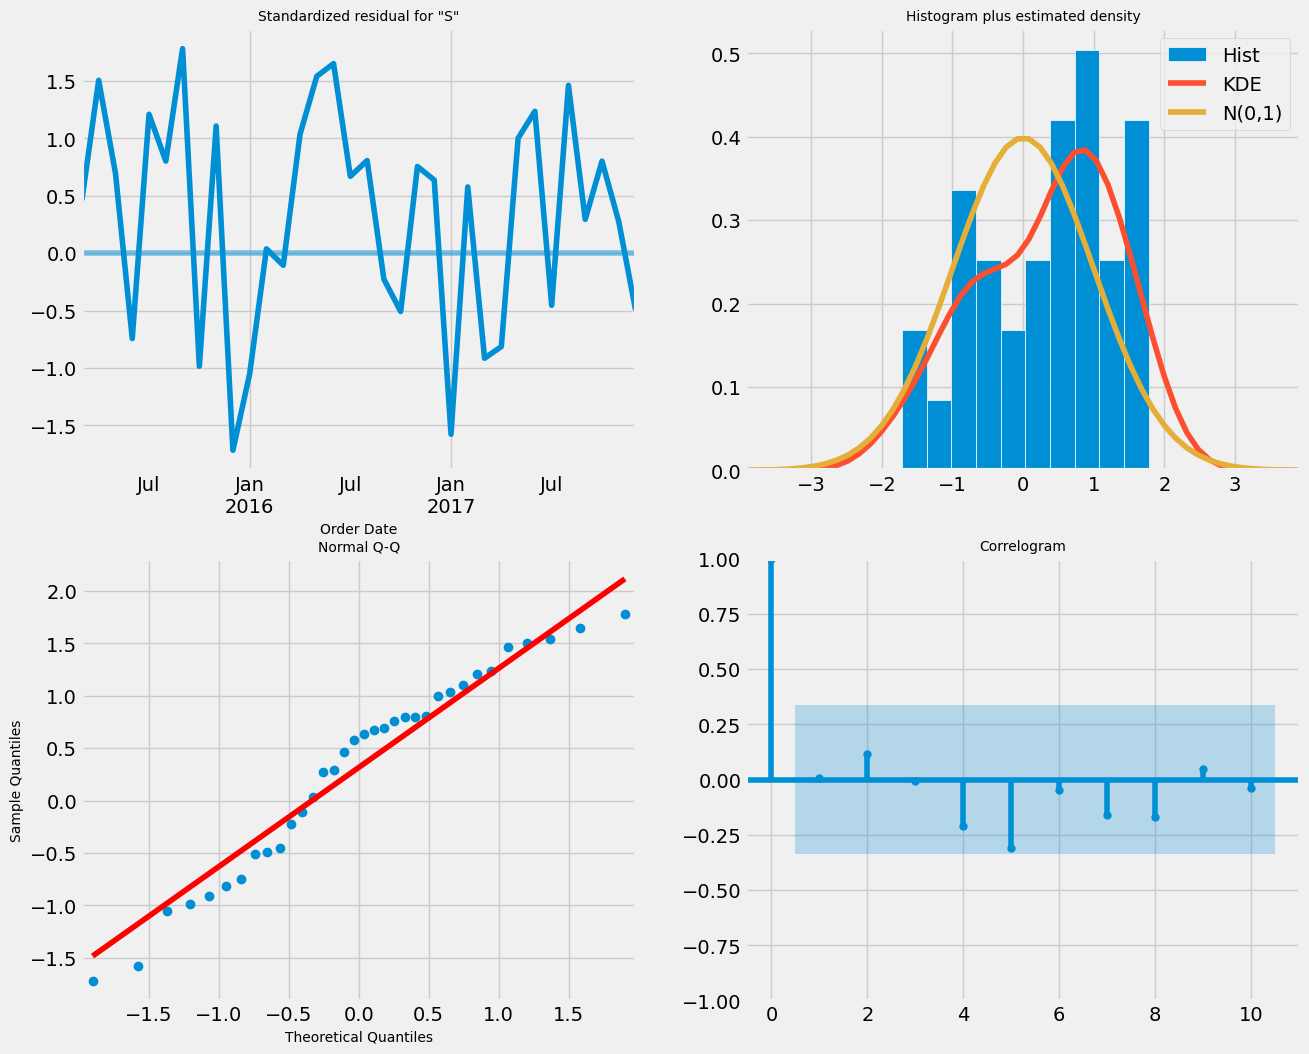

In [134]:
rcParams['figure.figsize'] = 14,12
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 10
resultstt.plot_diagnostics()

plt.show()

**Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.**

In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:

*  In the top right plot, we see that the red KDE line follows closely with the N
(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed although the mean is a bit shifted but its still a good model.

*   The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.

*   The residuals over time (top left plot) don’t display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

Those observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.

# Validation

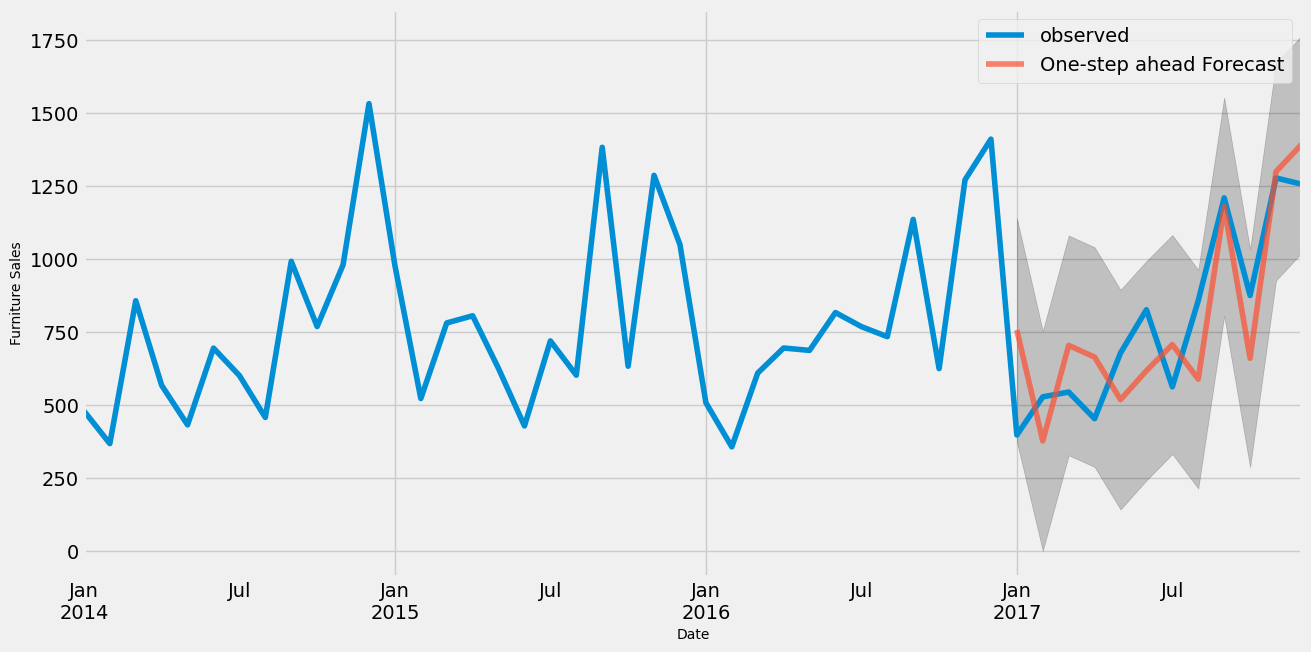

In [144]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

As you can see the forecast align with the true values, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

In [145]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 37603.46


In [147]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 193.92


In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator — it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set within 193 of the real sales. Our furniture daily sales range from around 400 to over 1200. In my opinion, this is a pretty good model so far.

# Forecasting

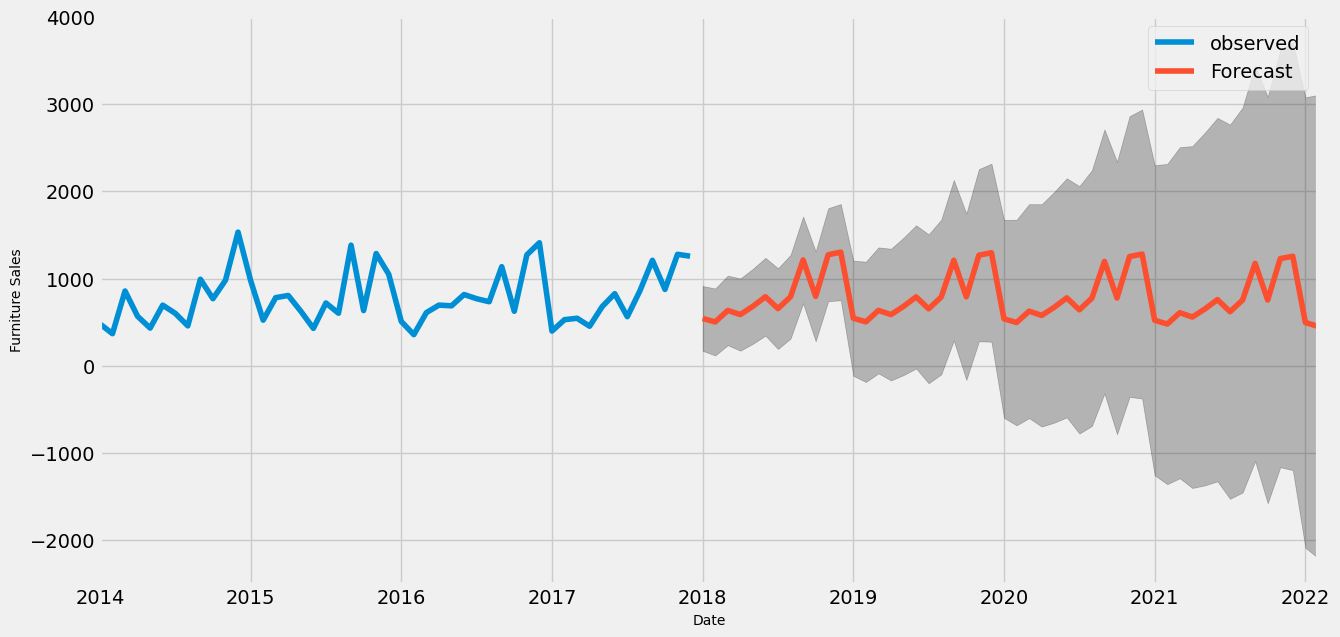

In [149]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

Our model clearly captured furniture sales seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.